## **SYNTHETIC CUSTOMER PROFILING DATA**
### This report analyzes the customer profiling scenario of  retail company for e.g. what age os customers has highest score , is there any relationship betwen customer age and their purchass ? etc.


## **DATASET OVERVIEW**
- **ROWS**:     200
- **Columns**:  5
- **Columns Names**: ID, Age, Income in Rs., Score,         Purchases
  - `Id`=Unique identifier for each customer
  - `Age`= age of customer
  - `Income in Rs.`=estimated annual income
  - `Score`=a score from 0 t 100 indicating customer's layalty towards company
  - `Purchases`=number of purchases by customers in last 6 month or 1 year

## **DATA CLEANING SUMARRY**
- filled 2 empty rows from column- 'Income', 'Score'
- correct an outliar from 'Score' column,used code 
  - `print(np.where((df['Score']>100) | (df['Score']<0)))`                       
  - `df.loc[75,'Score']=100`                                                     
  - `df['Score'].fillna(df['Score'].mean().round(2),inplace=True)`
- convert negative values of 'Age' into positive value
- fixed data types to int

## **EXPLORATORY DATA ANALYSIS**

 - AVG age of customer -39,while the minimum age is 18 and maximum age is 59
 - AVG annual income of customers are Rs. 52691.97, where around half of the total customers have income around Rs.42266.75
 - AVG scores of customers are 50 , with a max score of 100 and minimum of 1
 - AVG purchases made in 6 month or 1 year by each customer is around 5 units

In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt ,seaborn as sns
df=pd.read_csv('cleaned_file.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
print(df.describe().round(2))

           ID     Age  Income in Rs.   Score  Purchases
count  200.00  200.00         200.00  200.00     200.00
mean   100.50   38.72       52691.97   50.44       4.99
std     57.88   12.57       14729.71   31.02       2.20
min      1.00   18.00       20075.00    1.00       1.00
25%     50.75   28.00       42266.75   20.75       3.00
50%    100.50   40.00       52057.50   51.50       5.00
75%    150.25   49.25       63876.25   79.00       7.00
max    200.00   59.00       91016.00  100.00      11.00


- There is no correleation between any of the variables

In [4]:
print(df.corr().round())

                ID  Age  Income in Rs.  Score  Purchases
ID             1.0  0.0           -0.0   -0.0        0.0
Age            0.0  1.0           -0.0    0.0        0.0
Income in Rs. -0.0 -0.0            1.0   -0.0        0.0
Score         -0.0  0.0           -0.0    1.0        0.0
Purchases      0.0  0.0            0.0    0.0        1.0


- Group wise stats
  - grouping by 'Age' and calcluated mean and maximum value of variables 'Income in Rs.','Score'
  - grouping by 'Score' and calculated minimum and maximum value of variables 'Purchases'

In [7]:
group_1=df.groupby('Age')[['Income in Rs.','Score']].agg(['mean','max']).round(2)
print(group_1)
group_2=df.groupby('Score')['Purchases'].agg(['max','min'])
print("\n\n",group_2)


    Income in Rs.         Score     
             mean    max   mean  max
Age                                 
18       55763.50  77651  75.00   99
19       46458.33  68140  46.89   89
20       49643.60  58045  54.60   98
21       56901.00  77655  23.60   55
22       47027.50  53484  65.50   86
23       54406.75  65978  53.50   87
24       45579.00  68256  48.60   98
25       59695.14  71560  35.86   72
26       51428.20  70730  25.20   67
27       50629.00  50629  69.00   69
28       61609.20  75599  54.20   88
29       40138.67  57896  47.00   66
30       59240.33  68996  49.00   70
31       50369.17  65683  52.00   95
32       54960.88  71078  54.38   97
33       64255.50  67860  49.50   62
34       49467.75  73292  74.25   96
35       44205.33  51387  41.33   96
36       52703.50  62809  28.50   54
37       62597.50  63646  54.50   58
38       48047.00  58341  41.40   90
39       59531.50  73146  33.00   86
40       51307.40  63847  61.60   95
41       53089.44  71788  46.33   91
4

## **DATA VISUALIZATION**
- *Age vs INCOME* (scatter)
- *AGE vs Score*  (scatter)
- *Score vs Purchase*  (scatter)
- *Age Distribution*   (frequency distribution)
- *Age vs purchase*  (scatter)


Age vs Income in Rs.


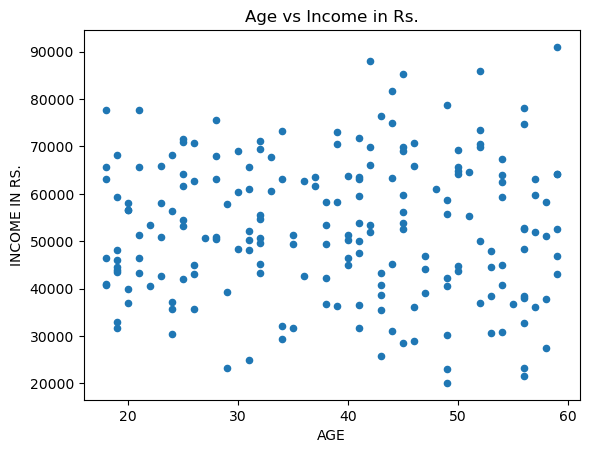

Age vs Score


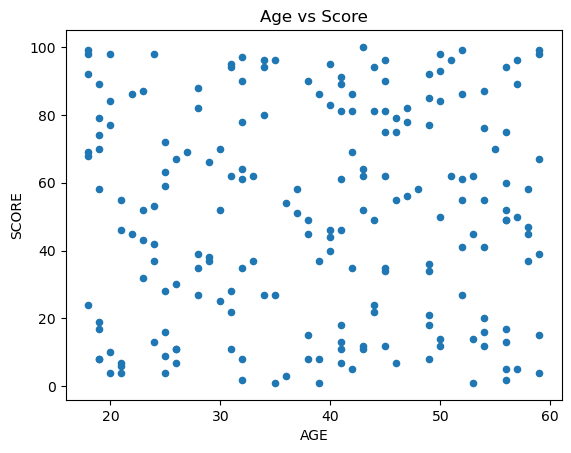

Score vs Purchases


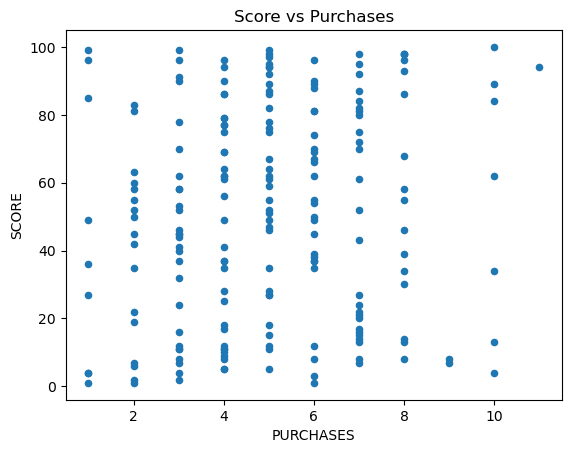

Age vs Purchases


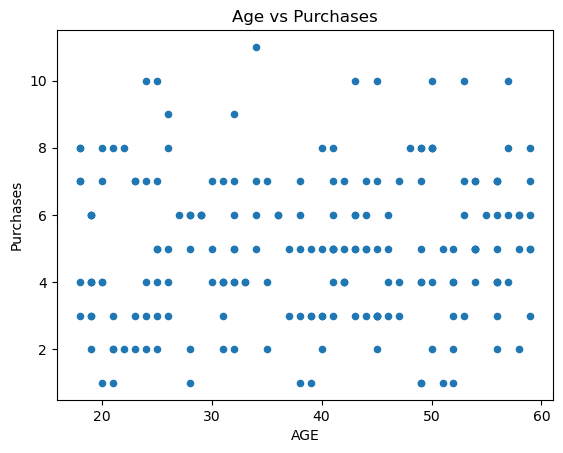

Age Distribution


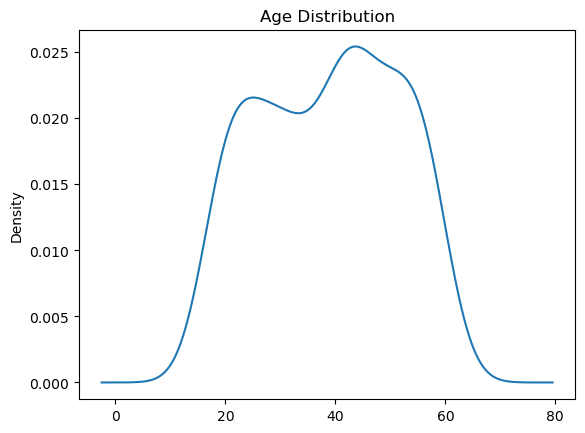

In [6]:
print('Age vs Income in Rs.')
x=df.sort_values(by='Age')                                      # sorting by age in a variabe to draw scatter
x.plot(kind='scatter',x='Age',y='Income in Rs.' , xlabel= 'AGE',ylabel='INCOME IN RS.')
plt.title('Age vs Income in Rs.')
plt.show()


print('Age vs Score')
x.plot(kind='scatter',x='Age',y='Score' , xlabel= 'AGE',ylabel='SCORE')
plt.title('Age vs Score')

plt.show()

print('Score vs Purchases')
y=df.sort_values(by='Score')                                    # sorting by Score in a variabe to draw scatter
y.plot(kind='scatter',x='Purchases',y='Score' , xlabel= 'PURCHASES',ylabel='SCORE')
plt.title('Score vs Purchases')
plt.show()

print('Age vs Purchases')
x.plot(kind='scatter',x='Age',y='Purchases' , xlabel= 'AGE',ylabel='Purchases')
plt.title('Age vs Purchases')
plt.show()

print('Age Distribution')
df['Age'].plot(kind='kde',xlabel= 'AGE',ylabel='FREQUENCY')
plt.title('Age Distribution')
plt.show()


## **KEY INSIGHTS**
- The company has over half of his customers of age around 40
- The wealthiest customer has annual income of Rs. 91016 , with an avg income of their customers Rs. 52691.97
-  On an average customers scored 50 in company's customer loyalty list
- In a year or in 6 months , the maximum sale has gone by a single customer is 11 , while avg sales by all customers is approx 5, with a minimum of 1 unit sold to a customer 
- From the Scatter Graphs and Correlation formula we found tha there is no association between any variables